# Clasificación Básica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imágenes de ropa, como tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imágenes en 10 categorias. Las imágenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [23]:
# Instalar TensorFlow (CPU)
!pip install tensorflow



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [25]:
dataset = keras.datasets.fashion_mnist
dataset.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [26]:
len(dataset.load_data()[0])

2

In [27]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [29]:
y_train

array([9, 0, 0, ..., 3, 0, 5], shape=(60000,), dtype=uint8)

## Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels? del cero al 1

1. 60.000
2. 10.000 
3. 28
4. 0 al 9 - 

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

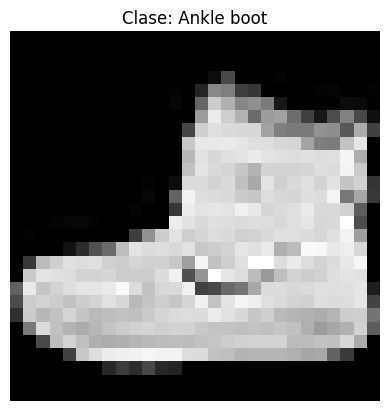

In [30]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Clase: {class_names[y_train[0]]}')
plt.axis('off')
plt.show()

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [31]:
# Escalar los conjuntos de train y test a rango [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

Para verificar que el set de datos está en el formato adecuado y que están listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes del *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

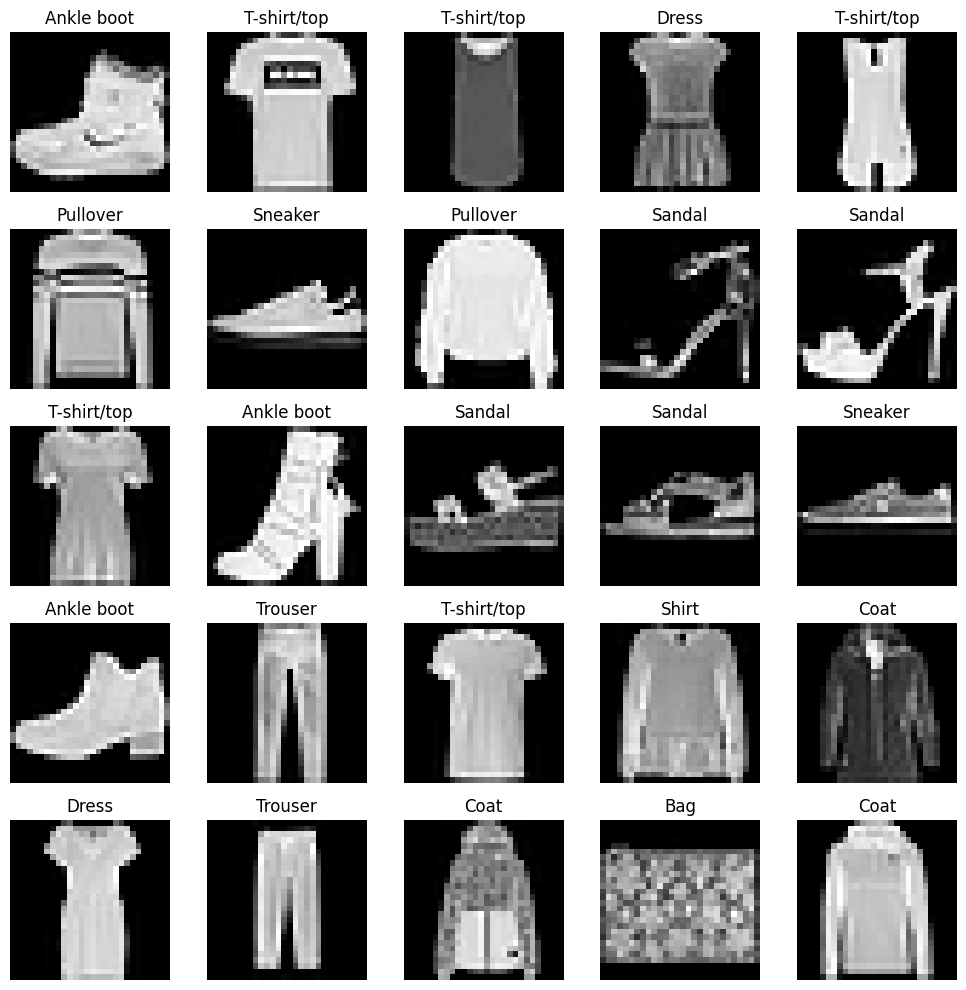

In [32]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [33]:
# 1. Configurar las capas del modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Capa de aplanamiento
    keras.layers.Dense(128, activation='relu'),  # Capa oculta
    keras.layers.Dense(10, activation='softmax')  # Capa de salida
])


### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [34]:
# 2. Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [35]:
# Mostrar resumen
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [36]:
# Entrenar el modelo
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_split=0.2
)

# Mostrar precisión final
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"\nPrecisión en entrenamiento: {train_acc:.4f}")
print(f"Precisión en test: {test_acc:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8211 - loss: 0.5132 - val_accuracy: 0.8360 - val_loss: 0.4510
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8619 - loss: 0.3836 - val_accuracy: 0.8680 - val_loss: 0.3746
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8749 - loss: 0.3446 - val_accuracy: 0.8683 - val_loss: 0.3695
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8824 - loss: 0.3191 - val_accuracy: 0.8783 - val_loss: 0.3394
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8881 - loss: 0.3010 - val_accuracy: 0.8789 - val_loss: 0.3333
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8944 - loss: 0.2840 - val_accuracy: 0.8793 - val_loss: 0.3376
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8995 - loss: 0.2708 - val_accuracy: 0.8796 - val_loss: 0.3312
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9046 - loss: 0.2588 - 

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [37]:
# Evaluar el modelo con datos de test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nPrecisión en datos de test: {test_acc:.4f}")

# Hacer predicciones
predictions = model.predict(X_test)
print(f"Predicción para primera imagen: {np.argmax(predictions[0])} (Real: {y_test[0]})")

313/313 - 0s - 1ms/step - accuracy: 0.8822 - loss: 0.3416

Precisión en datos de test: 0.8822
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
Predicción para primera imagen: 9 (Real: 9)


## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [38]:
# Hacer predicciones sobre todo el set de test
predictions = model.predict(X_test)

# Mostrar predicción para las primeras 10 imágenes
print("Predicciones para las primeras 10 imágenes:")
for i in range(10):
    pred_class = np.argmax(predictions[i])
    true_class = y_test[i]
    print(f"Imagen {i}: Predicción: {class_names[pred_class]} ({pred_class}) | Real: {class_names[true_class]} ({true_class})")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
Predicciones para las primeras 10 imágenes:
Imagen 0: Predicción: Ankle boot (9) | Real: Ankle boot (9)
Imagen 1: Predicción: Pullover (2) | Real: Pullover (2)
Imagen 2: Predicción: Trouser (1) | Real: Trouser (1)
Imagen 3: Predicción: Trouser (1) | Real: Trouser (1)
Imagen 4: Predicción: Shirt (6) | Real: Shirt (6)
Imagen 5: Predicción: Trouser (1) | Real: Trouser (1)
Imagen 6: Predicción: Coat (4) | Real: Coat (4)
Imagen 7: Predicción: Shirt (6) | Real: Shirt (6)
Imagen 8: Predicción: Sandal (5) | Real: Sandal (5)
Imagen 9: Predicción: Sneaker (7) | Real: Sneaker (7)


El modelo ha predicho la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

Predicción: 9 (Ankle boot)
Real: 9 (Ankle boot)
Confianza: 98.72%


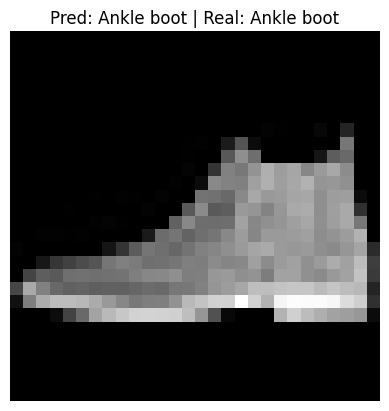

In [39]:
# Primera predicción
first_prediction = np.argmax(predictions[0])
print(f"Predicción: {first_prediction} ({class_names[first_prediction]})")
print(f"Real: {y_test[0]} ({class_names[y_test[0]]})")
print(f"Confianza: {predictions[0][first_prediction]:.2%}")

# Mostrar la imagen
plt.imshow(X_test[0], cmap='gray')
plt.title(f'Pred: {class_names[first_prediction]} | Real: {class_names[y_test[0]]}')
plt.axis('off')
plt.show()

*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [40]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

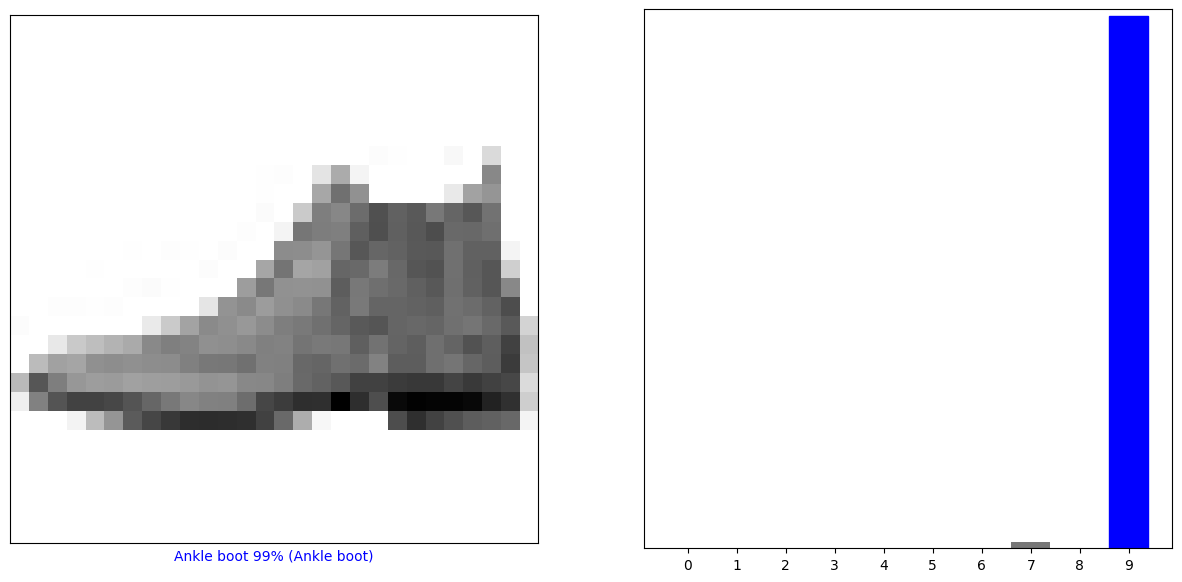

In [42]:
i = 0
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

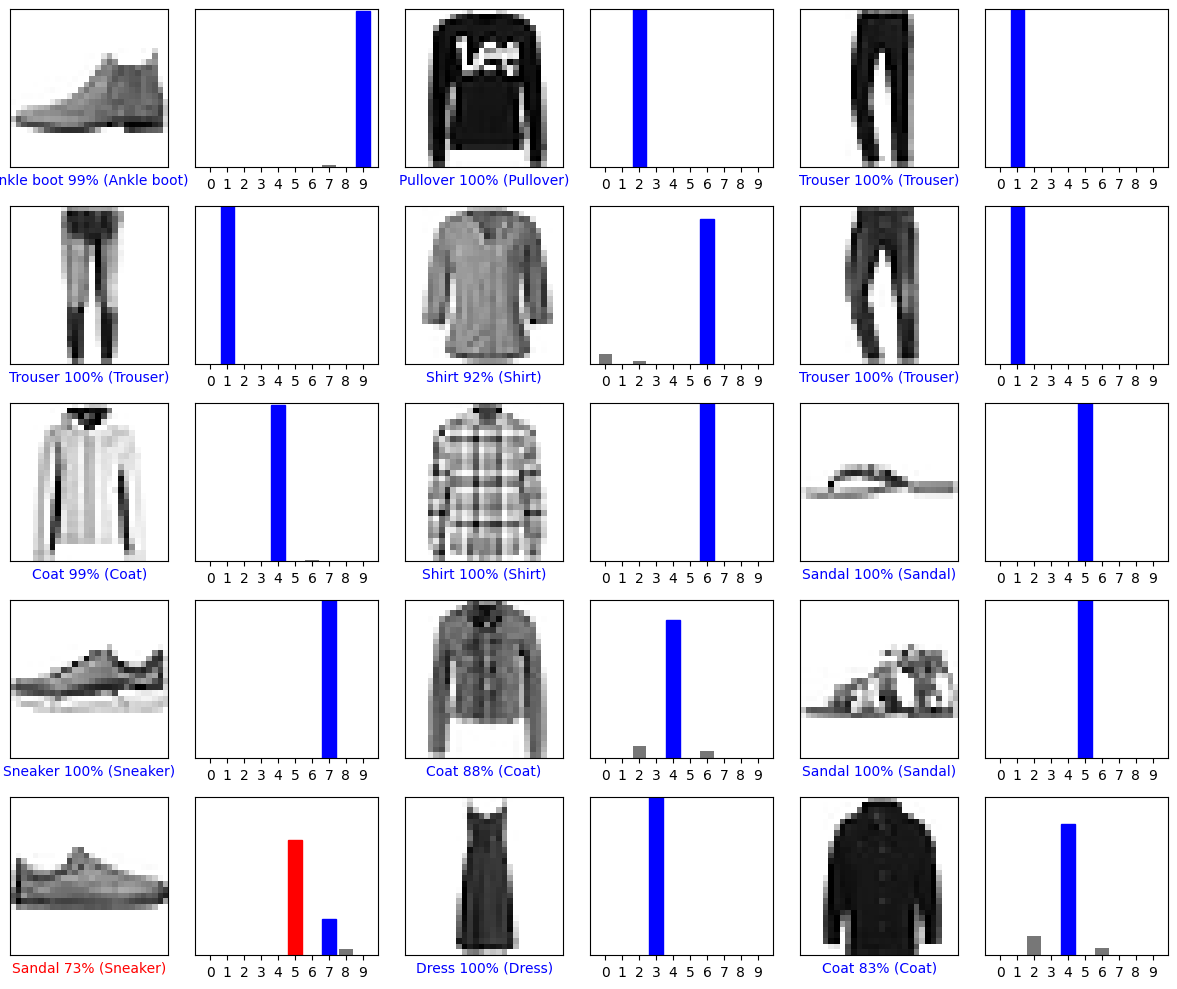

In [43]:
# Graficar predicciones para múltiples imágenes
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predicha.

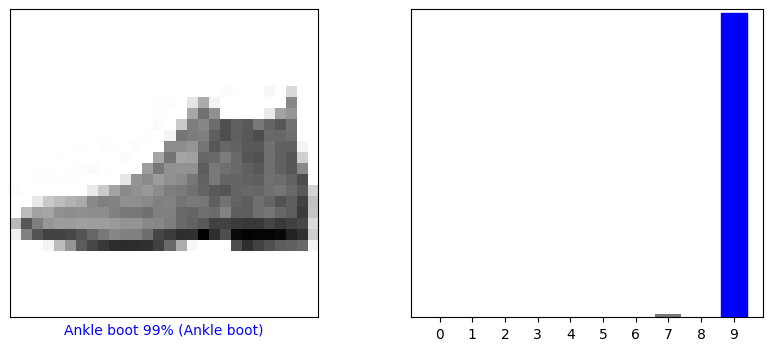

Distribución de confianza para imagen 0:
  T-shirt/top    : 0.0000 (  0.0%)
  Trouser        : 0.0000 (  0.0%)
  Pullover       : 0.0000 (  0.0%)
  Dress          : 0.0000 (  0.0%)
  Coat           : 0.0000 (  0.0%)
  Sandal         : 0.0012 (  0.1%)
  Shirt          : 0.0000 (  0.0%)
  Sneaker        : 0.0116 (  1.2%)
  Bag            : 0.0000 (  0.0%)
  Ankle boot     : 0.9872 ( 98.7%)

Predicción más alta: Ankle boot (98.7%)
Etiqueta real: Ankle boot


In [44]:
# Imagen [0] específica
i = 0
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], y_test)
plt.show()

# Detalles de la predicción
print(f"Distribución de confianza para imagen {i}:")
for j in range(10):
    conf = predictions[i][j]
    print(f"  {class_names[j]:15s}: {conf:.4f} ({conf*100:5.1f}%)")
print(f"\nPredicción más alta: {class_names[np.argmax(predictions[i])]} ({np.max(predictions[i])*100:.1f}%)")
print(f"Etiqueta real: {class_names[y_test[i]]}")

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

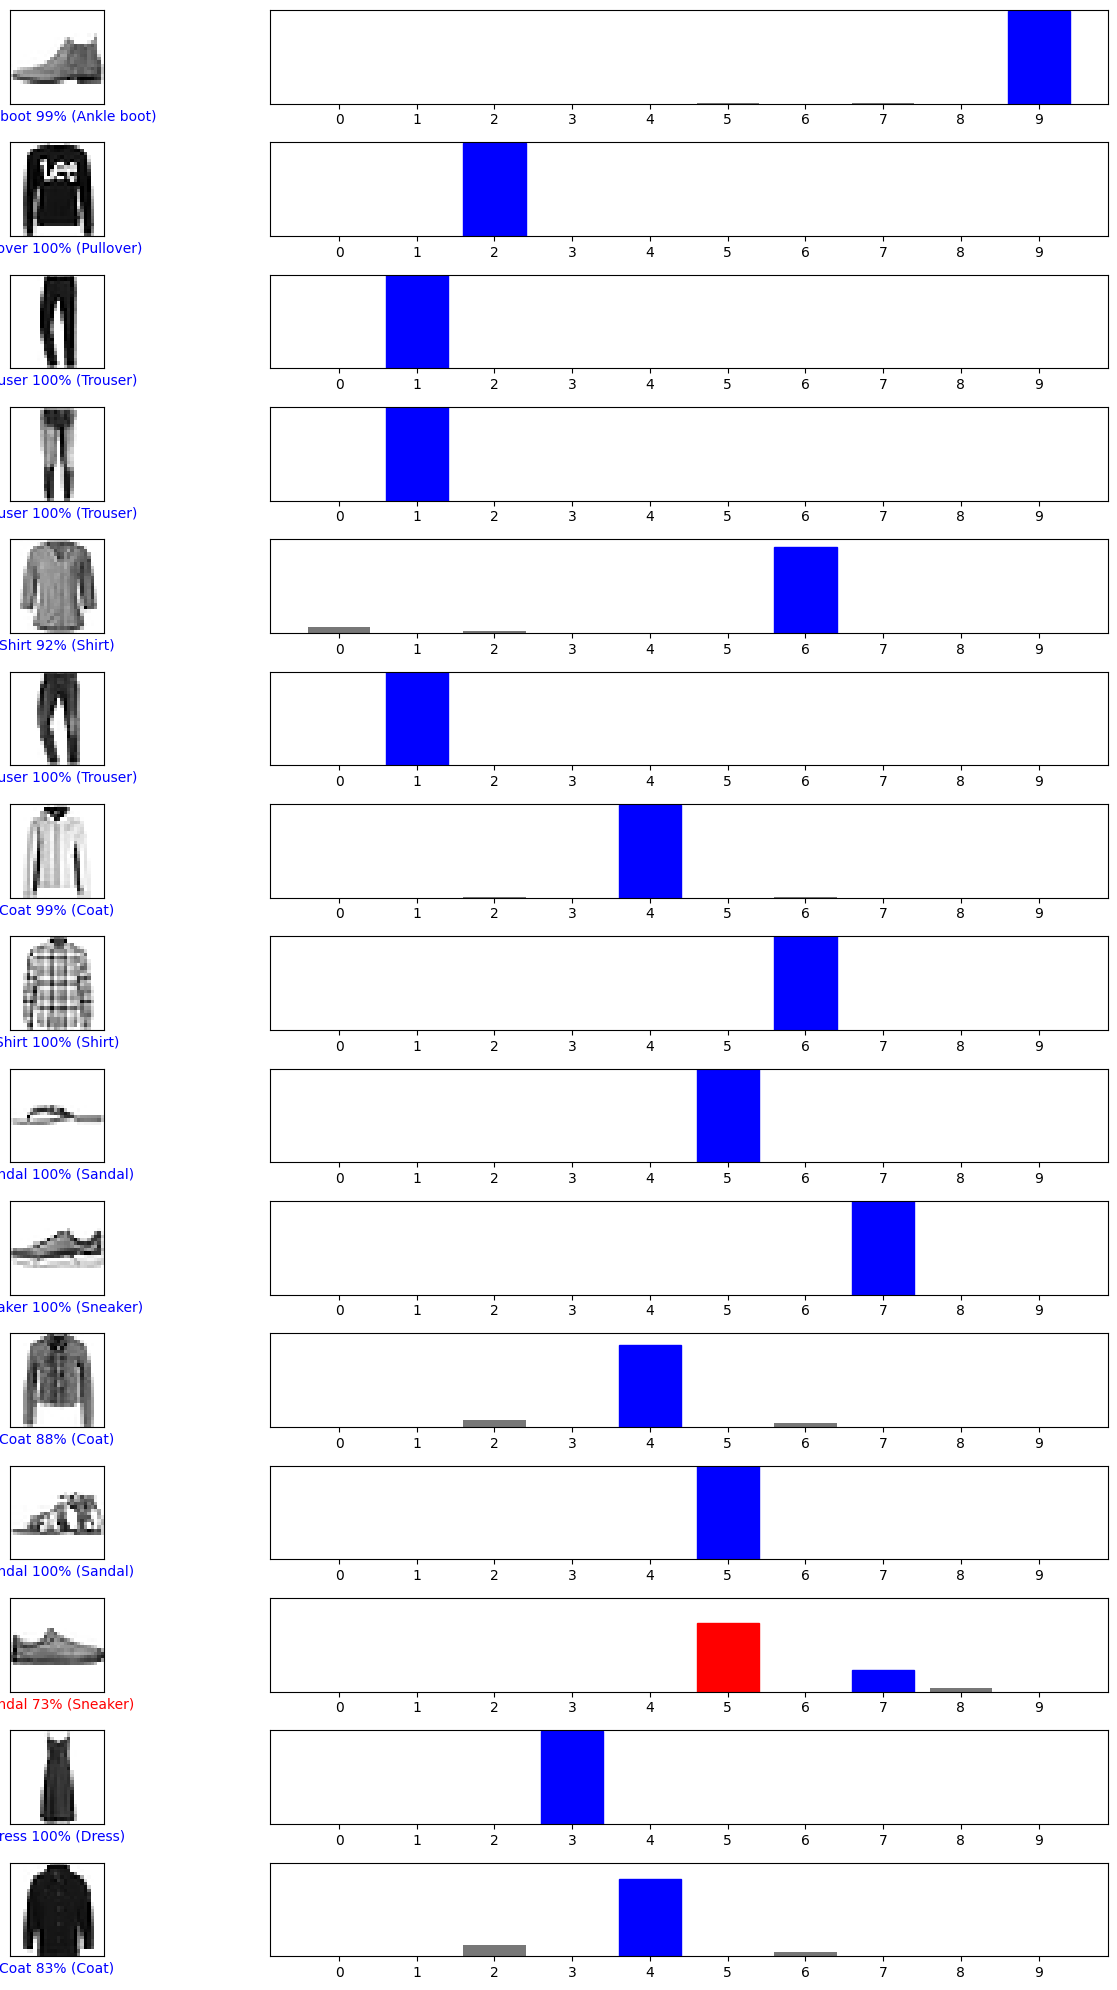

In [45]:
# Graficar múltiples imágenes con sus predicciones
num_images = 15
plt.figure(figsize=(15, 20))
for i in range(num_images):
    plt.subplot(num_images, 2, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_images, 2, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Evalúa tu modelo con una matriz de confusión e interprétala.

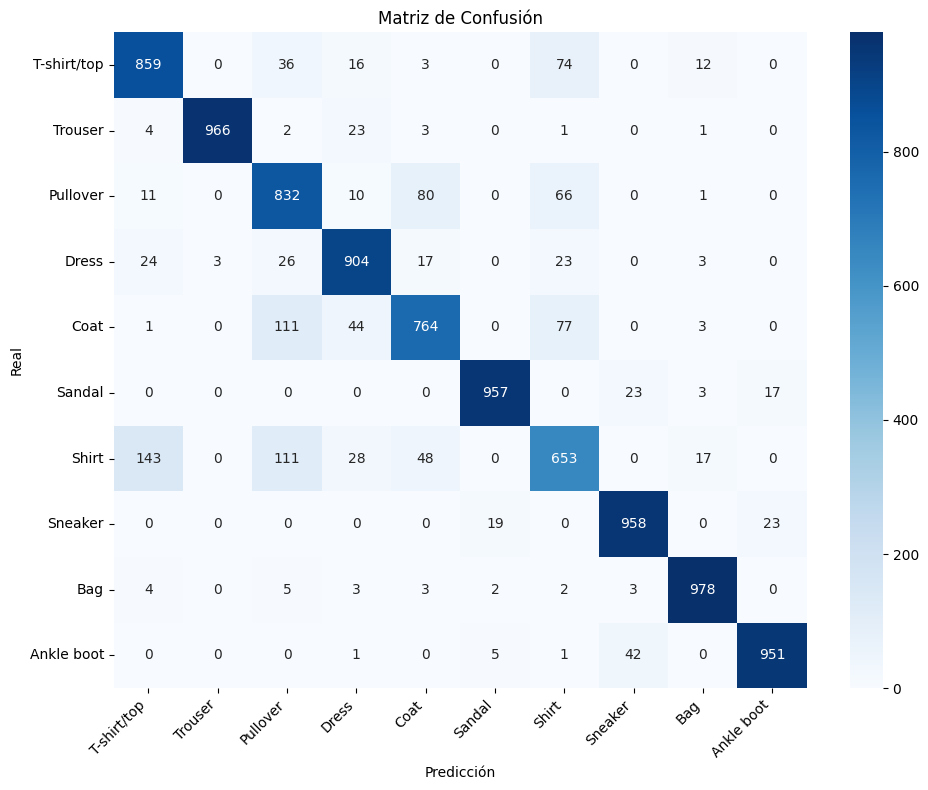


REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.74      0.83      0.78      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.83      0.76      0.80      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.73      0.65      0.69      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


ANÁLISIS DE ERRORES MÁS COMUNES
T-shirt/top     → Pullover       : 36 casos (3.6%)
T-shirt/top     → Dress          : 16 casos (1.6%)
T-shirt/top     → Coat           : 3 casos (0.3%)
T-shirt/top     → Shirt       

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Obtener predicciones de clase
y_pred = np.argmax(predictions, axis=1)

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Reporte de clasificación
print("\n" + "="*60)
print("REPORTE DE CLASIFICACIÓN")
print("="*60)
print(classification_report(y_test, y_pred, target_names=class_names))

# Análisis de errores más comunes
print("\n" + "="*60)
print("ANÁLISIS DE ERRORES MÁS COMUNES")
print("="*60)
for i in range(10):
    for j in range(10):
        if i != j and cm[i][j] > 0:
            error_rate = cm[i][j] / cm[i].sum() * 100
            print(f"{class_names[i]:15s} → {class_names[j]:15s}: {cm[i][j]} casos ({error_rate:.1f}%)")

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

PREDICCIÓN PARA IMAGEN INDIVIDUAL
Índice de imagen: 12
Predicción: 5 (Sandal)
Real: 7 (Sneaker)
Confianza: 73.15%
Correcto: NO


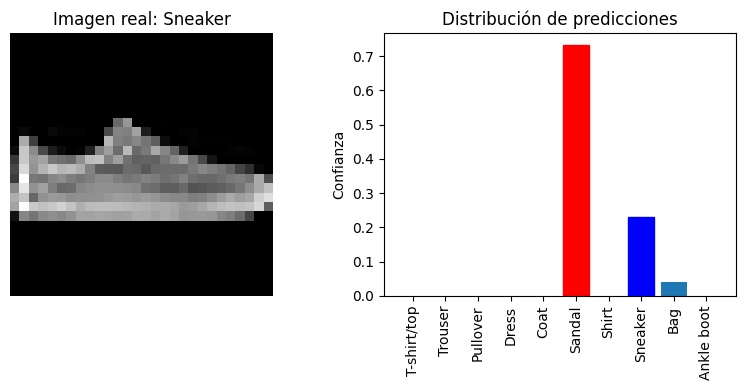

In [47]:
# Seleccionar una imagen individual del test
single_image_index = 12  # número de indice, se puede cambiar 
single_image = X_test[single_image_index]
true_label = y_test[single_image_index]

# Expandir dimensiones para que sea (1, 28, 28) en lugar de (28, 28)
single_image_expanded = np.expand_dims(single_image, axis=0)

# Hacer predicción
single_prediction = model.predict(single_image_expanded, verbose=0)
predicted_label = np.argmax(single_prediction[0])
confidence = single_prediction[0][predicted_label]

# Mostrar resultados
print("="*50)
print(f"PREDICCIÓN PARA IMAGEN INDIVIDUAL")
print("="*50)
print(f"Índice de imagen: {single_image_index}")
print(f"Predicción: {predicted_label} ({class_names[predicted_label]})")
print(f"Real: {true_label} ({class_names[true_label]})")
print(f"Confianza: {confidence:.2%}")
print(f"Correcto: {'SÍ' if predicted_label == true_label else 'NO'}")

# Graficar
plt.figure(figsize=(8, 4))

# Imagen
plt.subplot(1, 2, 1)
plt.imshow(single_image, cmap='gray')
plt.title(f'Imagen real: {class_names[true_label]}')
plt.axis('off')

# Distribución de confianza
plt.subplot(1, 2, 2)
bars = plt.bar(range(10), single_prediction[0])
plt.xticks(range(10), class_names, rotation=90)
plt.ylabel('Confianza')
plt.title('Distribución de predicciones')

# Resaltar predicción y verdad
bars[predicted_label].set_color('red' if predicted_label != true_label else 'green')
if predicted_label != true_label:
    bars[true_label].set_color('blue')

plt.tight_layout()
plt.show()

Probando con una imagen del test set...

RESULTADOS:
Clase predicha: 1 (Trouser)
Clase real: 1 (Trouser)
Confianza: 99.98%
Correcto: SÍ

Top 3 predicciones:
  Trouser: 99.98%
  Dress: 0.02%
  Coat: 0.00%


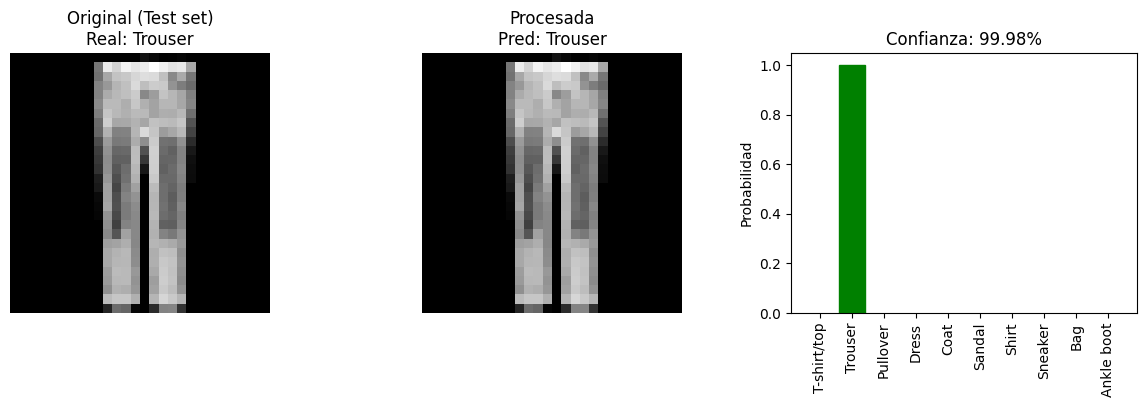

In [52]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

def preprocess_external_image(image_path, target_size=(28, 28)):
    """
    Preprocesa una imagen externa para que sea compatible con el modelo
    """
    # Cargar imagen (desde archivo o URL)
    if isinstance(image_path, str):
        if image_path.startswith('http'):
            # Desde URL
            response = requests.get(image_path)
            img = Image.open(BytesIO(response.content))
        else:
            # Desde archivo local
            img = Image.open(image_path)
    else:
        # Si ya es un array numpy (para probar con imágenes del dataset)
        img = Image.fromarray((image_path * 255).astype(np.uint8))
    
    # Convertir a escala de grises si es necesario
    if img.mode != 'L':
        img = img.convert('L')
    
    # Redimensionar a 28x28
    img = img.resize(target_size, Image.Resampling.LANCZOS)
    
    # Convertir a array numpy
    img_array = np.array(img, dtype=np.float32)
    
    # Invertir colores si es necesario (Fashion MNIST tiene fondo negro)
    # La mayoría de imágenes de internet tienen fondo blanco
    # Calculamos el promedio para decidir si invertir
    avg_pixel = np.mean(img_array)
    if avg_pixel > 127:  # Si el fondo es claro
        img_array = 255 - img_array
    
    # Normalizar a [0, 1]
    img_array = img_array / 255.0
    
    return img_array

def predict_external_image(image_path):
    """
    Predice la clase de una imagen externa
    """
    # Preprocesar imagen
    processed_image = preprocess_external_image(image_path)
    
    # Expandir dimensiones para batch (1, 28, 28)
    image_for_model = np.expand_dims(processed_image, axis=0)
    
    # Hacer predicción
    prediction = model.predict(image_for_model, verbose=0)
    predicted_class = np.argmax(prediction[0])
    confidence = prediction[0][predicted_class]
    
    return processed_image, predicted_class, confidence, prediction[0]

# Probemos con una imagen del test set primero (para verificar que funciona)
print("Probando con una imagen del test set...")
test_index = 15  # Puedes cambiar este número

# Usar una imagen del dataset de prueba
test_image = X_test[test_index]
true_label = y_test[test_index]

processed_img, pred_class, conf, all_probs = predict_external_image(test_image)

print(f"\nRESULTADOS:")
print(f"Clase predicha: {pred_class} ({class_names[pred_class]})")
print(f"Clase real: {true_label} ({class_names[true_label]})")
print(f"Confianza: {conf:.2%}")
print(f"Correcto: {'SÍ' if pred_class == true_label else 'NO'}")

# Mostrar top 3 predicciones
top_3_indices = np.argsort(all_probs)[-3:][::-1]
print("\nTop 3 predicciones:")
for idx in top_3_indices:
    print(f"  {class_names[idx]}: {all_probs[idx]:.2%}")

# Visualizar
plt.figure(figsize=(12, 4))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(X_test[test_index], cmap='gray')
plt.title(f'Original (Test set)\nReal: {class_names[true_label]}')
plt.axis('off')

# Imagen procesada
plt.subplot(1, 3, 2)
plt.imshow(processed_img, cmap='gray')
plt.title(f'Procesada\nPred: {class_names[pred_class]}')
plt.axis('off')

# Barras de probabilidad
plt.subplot(1, 3, 3)
bars = plt.bar(range(10), all_probs)
plt.xticks(range(10), class_names, rotation=90)
plt.ylabel('Probabilidad')
plt.title(f'Confianza: {conf:.2%}')
bars[pred_class].set_color('green' if pred_class == true_label else 'red')
if pred_class != true_label:
    bars[true_label].set_color('blue')

plt.tight_layout()
plt.show()

In [53]:
# Para usar con tu imagen local (descomenta y modifica):
image_path = "descarga.jpg"
processed_img, pred_class, conf, all_probs = predict_external_image(image_path)
print(f"Tu imagen es: {class_names[pred_class]} ({conf:.2%} de confianza)")

Tu imagen es: T-shirt/top (96.72% de confianza)
